In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier

In [38]:
#from google.colab import drive
#drive.mount('/content/drive')
df = pd.read_csv("house_train.csv")

In [39]:
numeric = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [40]:
df2 = df[numeric]

In [41]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [42]:
X = df2.drop(['SalePrice', 'LotArea', 'OverallQual', 'YrSold', 'GarageArea'],axis=1)
y = df2['SalePrice']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)

In [45]:
linmodel =  RandomForestClassifier().fit(X_train, y_train)

In [46]:
reggb = GradientBoostingRegressor(random_state=0)
reggb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [47]:
y_pred3 = reggb.predict(X_test)

r2: 0.85
MAE:  19976.472396556943
RMSE:  32607.306043327288


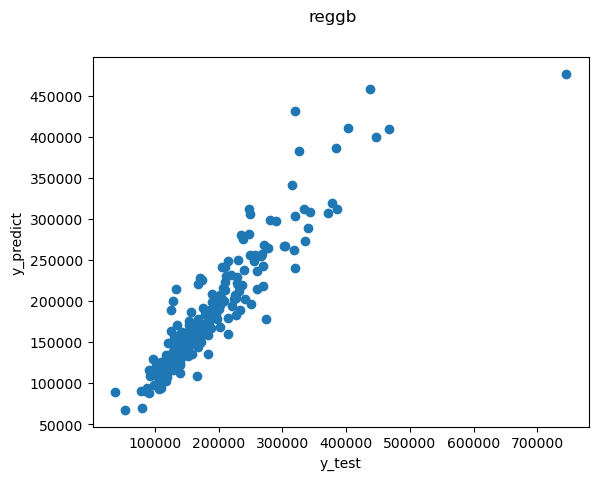

In [48]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "reggb")

# Валидация (Эрдэни)

In [58]:
test = pd.read_csv('house_test.csv',index_col=0)
X_2 = test[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']].drop(['LotArea', 'OverallQual', 'YrSold', 'GarageArea'],axis=1)
X_2.fillna(X_2.mean(), inplace=True)

In [60]:
y_pred = reggb.predict(X_2)

In [61]:
df_true = pd.read_csv("house_y_true.csv")
y_true = df_true['SalePrice'].values
len(y_true)

365

In [62]:
print("RMSE: ", mean_squared_error(y_true, y_pred, squared=False))

RMSE:  31260.4770453623
